<a href="https://colab.research.google.com/github/s34836/EWD/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tasks
1. Check if the other columns in the `diamonds` dataset contain outliers.


In [5]:
import pandas as pd
import numpy as np

diamonds_raw = pd.read_csv("diamonds.csv")
diamonds = diamonds_raw.copy()
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
diamonds.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [7]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
# Group by 'cut' and count
cut_counts = diamonds.groupby('cut').size().reset_index(name='count')
print("Cut Counts:\n", cut_counts)

# Group by 'color' and count
color_counts = diamonds.groupby('color').size().reset_index(name='count')
print("\nColor Counts:\n", color_counts)

# Group by 'clarity' and count
clarity_counts = diamonds.groupby('clarity').size().reset_index(name='count')
print("\nClarity Counts:\n", clarity_counts)


Cut Counts:
          cut  count
0       Fair   1610
1       Good   4906
2      Ideal  21551
3    Premium  13791
4  Very Good  12082

Color Counts:
   color  count
0     D   6775
1     E   9797
2     F   9542
3     G  11292
4     H   8304
5     I   5422
6     J   2808

Clarity Counts:
   clarity  count
0      I1    741
1      IF   1790
2     SI1  13065
3     SI2   9194
4     VS1   8171
5     VS2  12258
6    VVS1   3655
7    VVS2   5066


In [17]:
def detect_outliers_zscore(df, columns, sigma):
    for col in columns:
        df[f'{col}_zscore'] = np.abs((df[col] - df[col].mean()) / df[col].std())
        outliers = df[df[f'{col}_zscore'] > sigma]
        print(f"Outliers in {col}:\n{outliers[[col, f'{col}_zscore']]}")
    return df

diamonds = detect_outliers_zscore(diamonds, ['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], 3)


Outliers in carat:
       carat  carat_zscore
13757   2.22      3.000056
14138   2.27      3.105539
15684   2.49      3.569663
16283   3.00      4.645587
16439   2.22      3.000056
...      ...           ...
27727   2.61      3.822821
27731   2.55      3.696242
27739   2.80      4.223656
27744   2.29      3.147732
27749   2.29      3.147732

[439 rows x 2 columns]
Outliers in depth:
       depth  depth_zscore
2       56.9      3.384987
91      55.1      4.641425
97      66.3      3.176412
204     67.9      4.293246
221     57.2      3.175581
...      ...           ...
53727   66.9      3.595224
53756   55.6      4.292415
53757   55.4      4.432019
53800   68.7      4.851662
53863   66.8      3.525422

[685 rows x 2 columns]
Outliers in table:
       table  table_zscore
2       65.0      3.375631
91      69.0      5.165748
227     67.0      4.270690
296     66.0      3.823161
314     70.0      5.613278
...      ...           ...
53542   67.0      4.270690
53660   67.0      4.270690
5369

2. Remove outliers from the dataset in `glass.csv`.
    * Option 1: remove all observation containing values with $|Z| > 3$. Hint: you can use the `apply` method to calculate the $Z$-score for several numeric columns at the same time.
    * Option 2: remove all observations, with at least two values outside the range $[Q_1 - 1.5(Q_3 - Q_1), Q_3 + 1.5(Q_3 - Q_1)]$.


In [31]:
glass_raw = pd.read_csv("glass.csv")
glass = glass_raw.copy()
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [25]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [26]:
glass.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [ ]:
numeric_cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
def detect_outliers_zscore(df, columns, sigma):
    for col in columns:
        df[f'{col}_zscore'] = np.abs((df[col] - df[col].mean()) / df[col].std())
    return df

glass = detect_outliers_zscore(glass, numeric_cols, 3)

zscore_cols = [f'{col}_zscore' for col in numeric_cols]
glass_cleaned = glass[(glass[zscore_cols] <= 3).all(axis=1)]

glass_cleaned = glass_cleaned.drop(columns=[f'{col}_zscore' for col in numeric_cols])

glass = glass_raw.copy()


In [39]:
glass_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 212
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      194 non-null    float64
 1   Na      194 non-null    float64
 2   Mg      194 non-null    float64
 3   Al      194 non-null    float64
 4   Si      194 non-null    float64
 5   K       194 non-null    float64
 6   Ca      194 non-null    float64
 7   Ba      194 non-null    float64
 8   Fe      194 non-null    float64
 9   Type    194 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.7 KB


In [40]:
glass_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,194.0,1.518062,0.002288,1.51131,1.516513,1.517635,1.518995,1.52725
Na,194.0,13.416959,0.673292,11.03000,12.945000,13.305000,13.787500,15.15000
Mg,194.0,2.880000,1.308715,0.00000,2.855000,3.500000,3.610000,4.49000
Al,194.0,1.422732,0.443786,0.29000,1.190000,1.360000,1.602500,2.88000
Si,194.0,72.720619,0.584852,70.57000,72.372500,72.820000,73.087500,74.55000
K,194.0,0.431546,0.282287,0.00000,0.132500,0.555000,0.600000,1.76000
Ca,194.0,8.824639,0.989154,5.43000,8.240000,8.585000,9.077500,12.50000
Ba,194.0,0.123351,0.357125,0.00000,0.000000,0.000000,0.000000,1.64000
Fe,194.0,0.051598,0.085782,0.00000,0.000000,0.000000,0.090000,0.32000
Type,194.0,2.618557,2.030561,1.00000,1.000000,2.000000,3.000000,7.00000


In [44]:
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

numeric_cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
glass_cleaned_iqr = glass.copy()
outlier_counts = glass_cleaned_iqr[numeric_cols].apply(lambda x: ((x < (x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))) |
                                                                  (x > (x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))))) , axis=1).sum(axis=1)
glass_cleaned_iqr = glass_cleaned_iqr[outlier_counts < 2]
glass_cleaned_iqr


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


3. The dataset in `censusData-with3errors` contains three intentionally added errors. Find them and replace them with `pd.NA` or `np.nan`.


In [110]:
census_raw = pd.read_csv('censusData-with3errors', skipinitialspace=True, na_values='?')
census = census_raw.copy()
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [111]:

census.columns = [col.replace('-', '_') for col in census.columns]
census.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [112]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [113]:
census.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.586745,13.686097,3.0,28.0,37.0,48.0,237.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [114]:
census.sort_values(by='age', ascending=False).head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
7731,237,Private,210945,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,24,United-States,<=50K
1040,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
10545,90,Private,175491,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,9386,0,50,Ecuador,>50K
8963,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
24043,90,Self-emp-not-inc,82628,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Male,2964,0,12,United-States,<=50K


Error in line 7731 Age == 237

In [115]:
if census.iloc[7731].age == 237:
    census.iloc[7731, census.columns.get_loc('age')] = np.nan

In [116]:
census.sort_values(by='age', ascending=False).head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
8973,90.0,Private,46786,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,9386,0,15,United-States,>50K
8963,90.0,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1040,90.0,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
31030,90.0,Private,47929,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
24043,90.0,Self-emp-not-inc,82628,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Male,2964,0,12,United-States,<=50K


In [117]:
census.sort_values(by='age', ascending=True).head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
7326,3.0,State-gov,354929,Assoc-acdm,12,Divorced,Protective-serv,Not-in-family,Black,Male,0,0,38,United-States,<=50K
30889,17.0,Private,169155,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,35,United-States,<=50K
30898,17.0,Local-gov,192387,9th,5,Never-married,Other-service,Own-child,White,Male,0,0,45,United-States,<=50K
24739,17.0,Private,165918,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,Peru,<=50K
4379,17.0,Local-gov,191910,11th,7,Never-married,Sales,Own-child,White,Male,0,0,20,United-States,<=50K


Error in line 7326 Age == 3 and Divorced

In [118]:
if census.iloc[7326].age == 3:
    census.iloc[7326, census.columns.get_loc('age')] = np.nan

In [119]:
census.sort_values(by='age', ascending=True).head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
17486,17.0,Private,158704,10th,6,Never-married,Sales,Own-child,White,Male,0,0,20,United-States,<=50K
28167,17.0,Private,452406,11th,7,Never-married,Sales,Own-child,Black,Female,0,0,15,United-States,<=50K
12318,17.0,Private,127366,11th,7,Never-married,Sales,Own-child,White,Female,0,0,8,United-States,<=50K
10180,17.0,Private,297246,11th,7,Never-married,Priv-house-serv,Own-child,White,Female,0,0,9,United-States,<=50K
31864,17.0,Private,214787,12th,8,Never-married,Adm-clerical,Own-child,White,Female,0,0,25,United-States,<=50K


In [120]:
census.groupby('native_country').count()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
native_country,,,,,,,,,,,,,,
Cambodia,19,18,19,19,19,19,18,19,19,19,19,19,19,19
Canada,121,107,121,121,121,121,107,121,121,121,121,121,121,121
China,75,68,75,75,75,75,68,75,75,75,75,75,75,75
Columbia,59,56,59,59,59,59,56,59,59,59,59,59,59,59
Cuba,95,92,95,95,95,95,92,95,95,95,95,95,95,95
Dominican-Republic,70,67,70,70,70,70,67,70,70,70,70,70,70,70
Ecuador,28,27,28,28,28,28,27,28,28,28,28,28,28,28
El-Salvador,106,100,106,106,106,106,100,106,106,106,106,106,106,106
England,90,86,90,90,90,90,86,90,90,90,90,90,90,90


Error in line 32554 native-country = 'Unimed-States'

In [121]:
if "Unimed-States" in census.at[32554, 'native_country']:
    census.at[32554, 'native_country'] = np.nan

In [122]:
census[census['native_country'].str.contains("Unimed-States", na=False)]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income


In [123]:
census.groupby('native_country').count()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
native_country,,,,,,,,,,,,,,
Cambodia,19,18,19,19,19,19,18,19,19,19,19,19,19,19
Canada,121,107,121,121,121,121,107,121,121,121,121,121,121,121
China,75,68,75,75,75,75,68,75,75,75,75,75,75,75
Columbia,59,56,59,59,59,59,56,59,59,59,59,59,59,59
Cuba,95,92,95,95,95,95,92,95,95,95,95,95,95,95
Dominican-Republic,70,67,70,70,70,70,67,70,70,70,70,70,70,70
Ecuador,28,27,28,28,28,28,27,28,28,28,28,28,28,28
El-Salvador,106,100,106,106,106,106,100,106,106,106,106,106,106,106
England,90,86,90,90,90,90,86,90,90,90,90,90,90,90


4. The dataset from Task 3 contains missing values.
    - The missing values are stored as `?` in the file. Check in the documentation of `read_csv()` how to load them as `NA` values. Note: to load the file correctly set `skipinitialspace=True`.
    - Find the rows with the highest number of missing values and remove them. Hint: you can count the missing values in a row using `df.isna().sum(axis=1)`. The `value_counts()` method may also be useful.
    - Check which columns contain less than 3% of missing values. In these columns, replace the missing values with the most common value. Use the methods `fillna()`, `mode()`. Hint: use `mode()[0]` to get a single value.
    - Remove columns with more than 3% of values missing.


In [125]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32559 non-null  float64
 1   workclass       30725 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education_num   32561 non-null  int64  
 5   marital_status  32561 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital_gain    32561 non-null  int64  
 11  capital_loss    32561 non-null  int64  
 12  hours_per_week  32561 non-null  int64  
 13  native_country  31977 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [126]:
census.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32559.0,38.581744,13.640846,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [127]:
missing_counts = census.isna().sum(axis=1)

# Filter
rows_with_missing = census[missing_counts != 0].copy()
rows_with_missing.loc[:, "missing_count"] = missing_counts[missing_counts != 0]

rows_with_missing["missing_count"] = missing_counts[missing_counts != 0]

rows_with_missing.missing_count.value_counts()

,count
missing_count,
2,1809
1,566
3,27


In [128]:
missing_counts = census.isna().sum(axis=1)
max_missing = missing_counts.max()
census = census[missing_counts != max_missing]

In [129]:
missing_counts = census.isna().sum(axis=1)

# Filter
rows_with_missing = census[missing_counts != 0].copy()
rows_with_missing.loc[:, "missing_count"] = missing_counts[missing_counts != 0]

rows_with_missing["missing_count"] = missing_counts[missing_counts != 0]

rows_with_missing.missing_count.value_counts()

,count
missing_count,
2,1809
1,566


In [130]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32534 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32532 non-null  float64
 1   workclass       30725 non-null  object 
 2   fnlwgt          32534 non-null  int64  
 3   education       32534 non-null  object 
 4   education_num   32534 non-null  int64  
 5   marital_status  32534 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    32534 non-null  object 
 8   race            32534 non-null  object 
 9   sex             32534 non-null  object 
 10  capital_gain    32534 non-null  int64  
 11  capital_loss    32534 non-null  int64  
 12  hours_per_week  32534 non-null  int64  
 13  native_country  31977 non-null  object 
 14  income          32534 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 4.0+ MB


In [138]:
missing_percent = census.isna().mean()
low_na_columns = missing_percent[missing_percent < 0.03].index
missing_percent[missing_percent < 0.03]

,0
age,0.000061
fnlwgt,0.000000
education,0.000000
education_num,0.000000
marital_status,0.000000
relationship,0.000000
race,0.000000
sex,0.000000
capital_gain,0.000000
capital_loss,0.000000


In [142]:
missing_percent = census.isna().mean()
low_na_columns = missing_percent[missing_percent < 0.03].index
missing_percent[missing_percent < 0.03]
for col in low_na_columns:
    most_common = census[col].mode()[0]
    census[col] = census[col].fillna(most_common)

In [144]:
missing_percent = census.isna().mean()
low_na_columns = missing_percent[missing_percent < 0.03].index
missing_percent[missing_percent < 0.03]

,0
age,0.0
fnlwgt,0.0
education,0.0
education_num,0.0
marital_status,0.0
relationship,0.0
race,0.0
sex,0.0
capital_gain,0.0
capital_loss,0.0


In [145]:
print("col:", census.columns.tolist())
print("shape:", census.shape)

col: ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
shape: (32534, 15)


In [146]:
missing_percent = census.isna().mean()
census = census.loc[:, missing_percent <= 0.03]

In [147]:
print("col:", census.columns.tolist())
print("shape:", census.shape)

col: ['age', 'fnlwgt', 'education', 'education_num', 'marital_status', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
shape: (32534, 13)


5. Load any dataset from the [UCI repository](https://archive.ics.uci.edu/) and:
    - Visualize feature distributions. You can use for example: histograms, bar plots, scatter plots, pair plots, correlation heatmaps, etc.
    - Check if the dataset contains missing values or outliers. If the data contains any obvious errors, replace them with `NA`/`NaN` values.

In [155]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [156]:
heart_disease_raw = pd.concat([X, y], axis=1)
heart_disease_raw.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


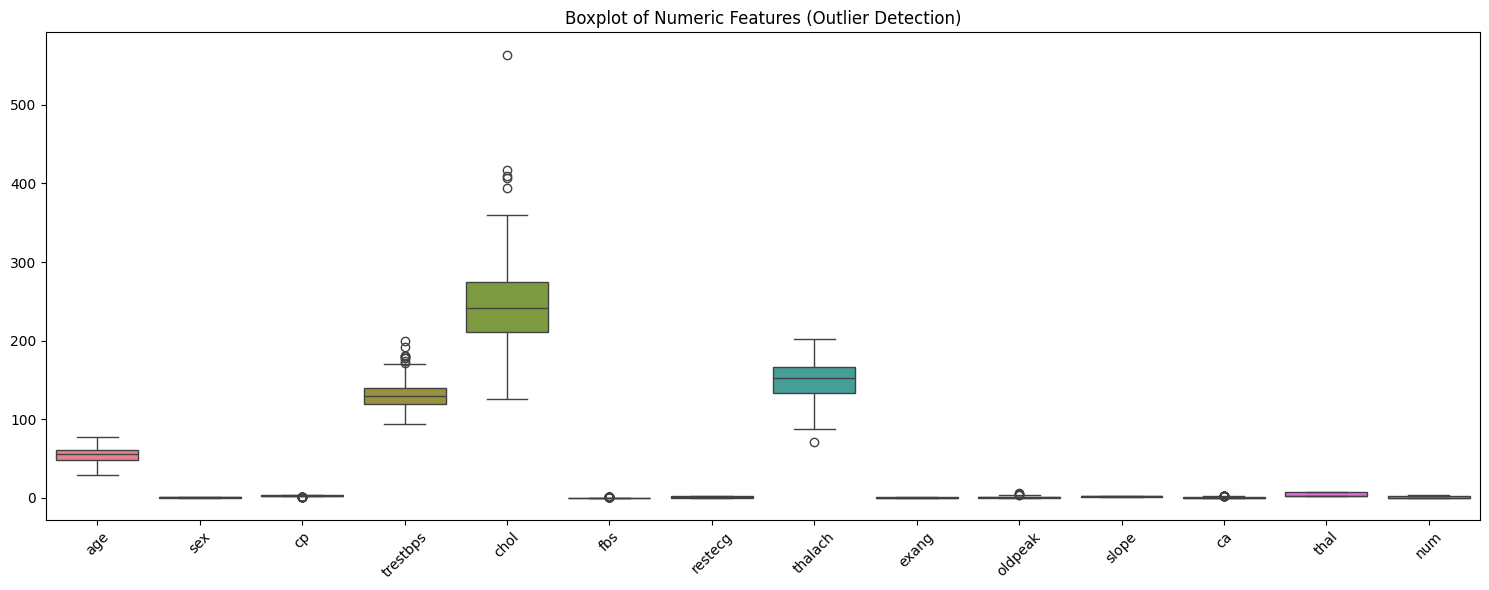

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

def outliers(dataset):
  plt.figure(figsize=(15, 6))
  sns.boxplot(data=dataset.select_dtypes(include='number'))
  plt.title("Boxplot of Numeric Features (Outlier Detection)")
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()
outliers(heart_disease_raw)

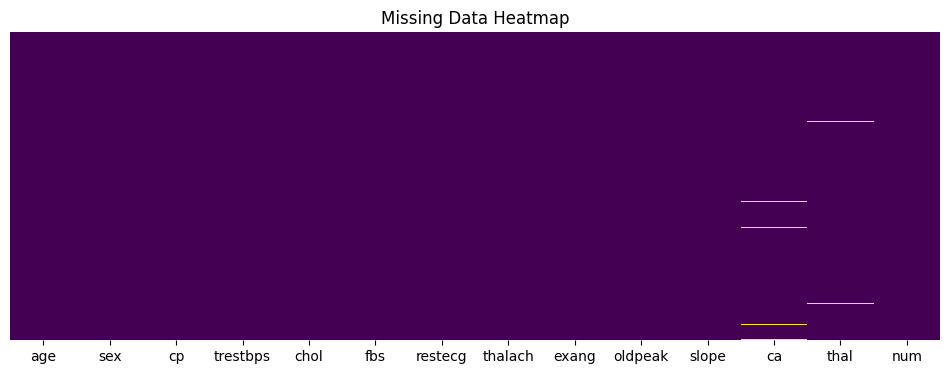

In [158]:
# Plot heatmap of missing values
plt.figure(figsize=(12, 4))
sns.heatmap(heart_disease_raw.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

In [159]:
heart_disease = heart_disease_raw.copy()
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [160]:
heart_disease[heart_disease.isna().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [161]:
from scipy.stats import zscore

chol_z = zscore(heart_disease['chol'])

heart_disease_with_z = heart_disease.copy()
heart_disease_with_z['chol_zscore'] = chol_z

chol_outliers = heart_disease_with_z[heart_disease_with_z['chol_zscore'].abs() > 3]

chol_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol_zscore
48,65,0,3,140,417,1,2,157,0,0.8,1,1.0,3.0,0,3.294686
121,63,0,4,150,407,0,2,154,0,4.0,2,3.0,7.0,4,3.101230
152,67,0,3,115,564,0,2,160,0,1.6,2,0.0,7.0,0,6.138485
181,56,0,4,134,409,0,2,150,1,1.9,2,2.0,7.0,2,3.139921


In [164]:
chol_z = zscore(heart_disease['chol'])
heart_disease.loc[abs(chol_z) > 3, 'chol'] = np.nan

In [166]:
from scipy.stats import zscore

chol_z = zscore(heart_disease['chol'])

heart_disease_with_z = heart_disease.copy()
heart_disease_with_z['chol_zscore'] = chol_z

chol_outliers = heart_disease_with_z[heart_disease_with_z['chol_zscore'].abs() > 3]

chol_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol_zscore


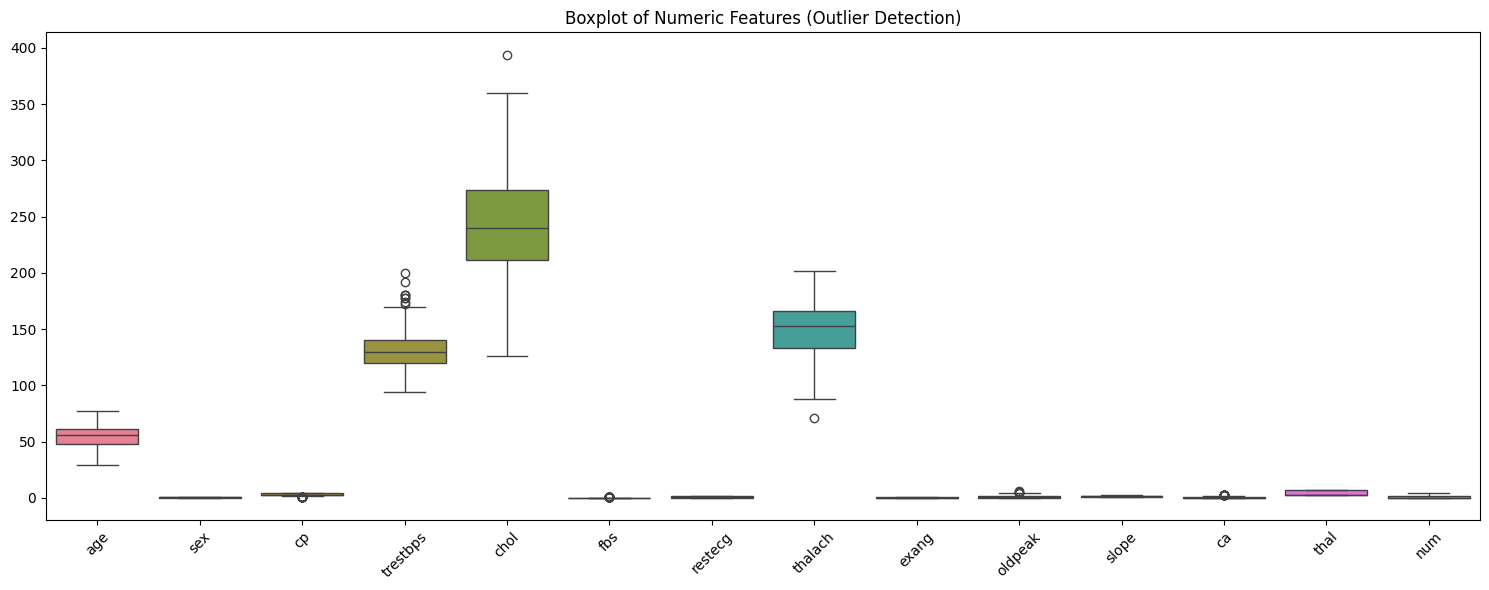

In [168]:
outliers(heart_disease)

In [169]:
chol_z = zscore(heart_disease['trestbps'])

heart_disease_with_z = heart_disease.copy()
heart_disease_with_z['trestbps_zscore'] = chol_z

chol_outliers = heart_disease_with_z[heart_disease_with_z['trestbps_zscore'].abs() > 3]

chol_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,trestbps_zscore
126,56,0,4,200,288.0,1,2,133,1,4.0,3,2.0,7.0,3,3.887739
188,54,1,2,192,283.0,0,2,195,0,0.0,1,1.0,7.0,1,3.432436


In [170]:
trestbps_z = zscore(heart_disease['trestbps'])
heart_disease.loc[abs(trestbps_z) > 3, 'trestbps'] = np.nan

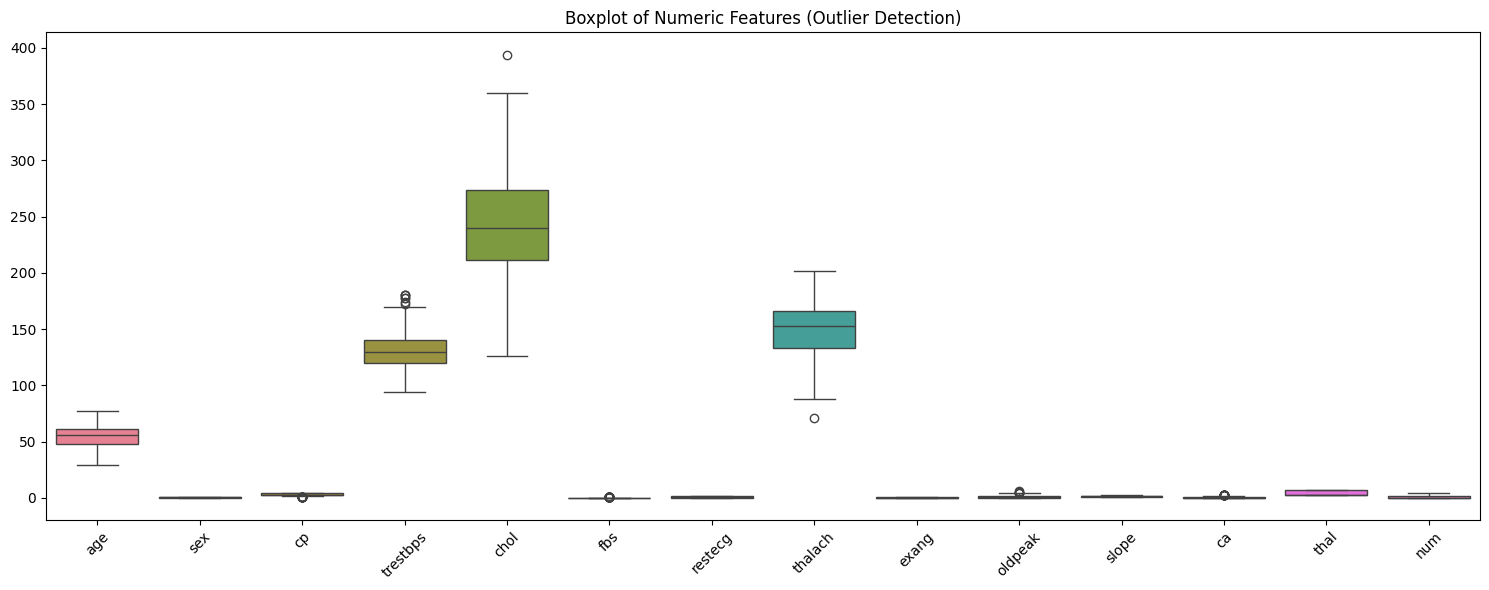

In [171]:
outliers(heart_disease)